In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Desktop/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [5]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [6]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frozen')

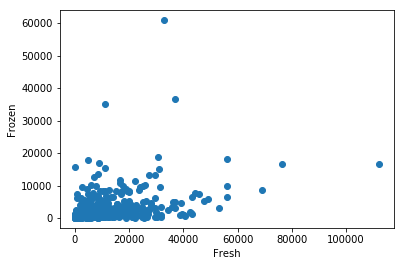

In [7]:
plt.scatter(df.Fresh,df['Frozen'])
plt.xlabel('Fresh')
plt.ylabel('Frozen')

In [19]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Fresh','Frozen']])
y_predicted

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2,
       0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [20]:
df['cluster']=y_predicted
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1


In [21]:
km.cluster_centers_

array([[ 5315.20136519,  2205.15358362],
       [20427.37190083,  3862.78512397],
       [48117.88461538,  9159.34615385]])

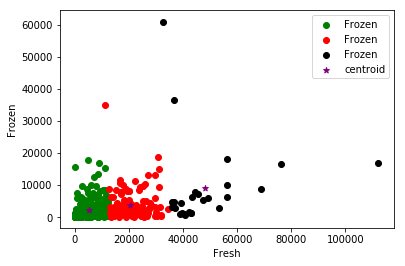

In [22]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Fresh,df1['Frozen'],color='green')
plt.scatter(df2.Fresh,df2['Frozen'],color='red')
plt.scatter(df3.Fresh,df3['Frozen'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.legend()

Preprocessing using min max scaler

In [23]:
scaler = MinMaxScaler()

scaler.fit(df[['Frozen']])
df['Frozen'] = scaler.transform(df[['Frozen']])

scaler.fit(df[['Fresh']])
df['Fresh'] = scaler.transform(df[['Fresh']])

C:\Users\naresh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\naresh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [24]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.112940,9656,7561,0.003106,2674,1338,0
1,0.062899,9810,9568,0.028548,3293,1776,0
2,0.056622,8808,7684,0.039116,3516,7844,0
3,0.118254,1196,4221,0.104842,507,1788,1
4,0.201626,5410,7198,0.063934,1777,5185,1


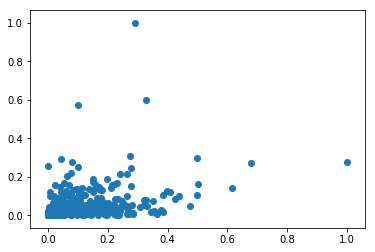

In [25]:
plt.scatter(df.Fresh,df['Frozen'])

In [26]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Fresh','Frozen']])
y_predicted

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,

In [27]:
df['cluster']=y_predicted
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.112940,9656,7561,0.003106,2674,1338,1
1,0.062899,9810,9568,0.028548,3293,1776,1
2,0.056622,8808,7684,0.039116,3516,7844,1
3,0.118254,1196,4221,0.104842,507,1788,1
4,0.201626,5410,7198,0.063934,1777,5185,2


In [28]:
km.cluster_centers_

array([[0.50205309, 0.41544154],
       [0.05594814, 0.03553702],
       [0.23409926, 0.0672228 ]])

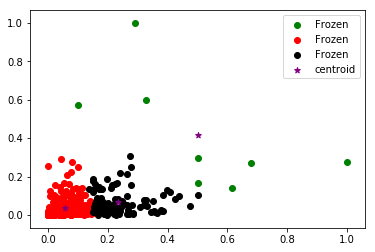

In [29]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Fresh,df1['Frozen'],color='green')
plt.scatter(df2.Fresh,df2['Frozen'],color='red')
plt.scatter(df3.Fresh,df3['Frozen'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Elbow Plot

In [30]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Fresh','Frozen']])
    sse.append(km.inertia_)

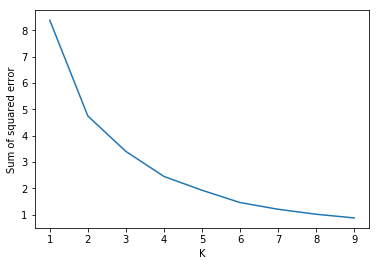

In [31]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [11]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
for n_clusters in range n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(df)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(df)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(df, preds, metric='euclidean')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

SyntaxError: invalid syntax (<ipython-input-18-b124d12050a6>, line 1)